In [2]:
import scanpy as sc
import scvelo as scv
import numpy as np

In [4]:
adata = sc.read_h5ad('/home/neha/dorsalmigration/velocity/velocity/results/adatasam_with_velocity.h5ad')

In [6]:
scv.pp.filter_and_normalize(adata)

Logarithmized X.


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [7]:
scv.pp.moments(adata)

/tmp/ipykernel_556/3618267578.py:1: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata)
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)


computing neighbors
    finished (0:00:27) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:33) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
scv.tl.velocity(adata)

computing velocities


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:02:53) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [10]:
scv.tl.velocity_graph(adata, n_jobs=1)

computing velocity graph (using 1/8 cores)
    finished (0:05:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [11]:
scv.set_figure_params()

In [12]:
adata.obs

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
s17_AAACCAAAGCATGGGA  dorsal migration      1204.0           669         0.0   
s17_AAACCAAAGTAGACCC  dorsal migration     10528.0          2950         0.0   
s17_AAACCAAAGTAGCTGC  dorsal migration      1415.0           681         0.0   
s17_AAACCAAAGTCATCTC  dorsal migration      8465.0          2362         0.0   
s17_AAACCAAAGTCGACGT  dorsal migration     18104.0          3799         0.0   
...                                ...         ...           ...         ...   
s19_TGTGTTGAGCATCAAT  dorsal migration       981.0           636         0.0   
s19_TGTGTTGAGCCTAGCG  dorsal migration       835.0           535         0.0   
s19_TGTGTTGAGGTCGTTA  dorsal migration       760.0           496         0.0   
s19_TGTGTTGAGGTTGCTA  dorsal migration      1175.0           740         0.0   
s19_TGTGTTGAGGTTGGAG  dorsal migration       633.0           418         0.0   

                     RNA_snn_res.0 seurat_clusters RNA_snn_res.0.1  \
s17_AAACCAAAGCATGGGA             0               8               4   
s17_AAACCAAAGTAGACCC             0               5               1   
s17_AAACCAAAGTAGCTGC             0               2               0   
s17_AAACCAAAGTCATCTC             0               5               1   
s17_AAACCAAAGTCGACGT             0               5               1   
...                            ...             ...             ...   
s19_TGTGTTGAGCATCAAT             0               1               1   
s19_TGTGTTGAGCCTAGCG             0              13               3   
s19_TGTGTTGAGGTCGTTA             0               1               0   
s19_TGTGTTGAGGTTGCTA             0               1               0   
s19_TGTGTTGAGGTTGGAG             0               1               0   

                     RNA_snn_res.0.2 RNA_snn_res.0.3 RNA_snn_res.0.4  ...  \
s17_AAACCAAAGCATGGGA               6               3               6  ...   
s17_AAACCAAAGTAGACCC               1               1               2  ...   
s17_AAACCAAAGTAGCTGC               0               0               1  ...   
s17_AAACCAAAGTCATCTC               1               1               2  ...   
s17_AAACCAAAGTCGACGT               1               1               2  ...   
...                              ...             ...             ...  ...   
s19_TGTGTTGAGCATCAAT               0               2               2  ...   
s19_TGTGTTGAGCCTAGCG               3               4               4  ...   
s19_TGTGTTGAGGTCGTTA               0               0               0  ...   
s19_TGTGTTGAGGTTGCTA               0               0               0  ...   
s19_TGTGTTGAGGTTGGAG               0               0               0  ...   

                     batch stage orig_cluster ident loom_batch  \
s17_AAACCAAAGCATGGGA   s17   s17        s17_8     8          0   
s17_AAACCAAAGTAGACCC   s17   s17        s17_2     5          0   
s17_AAACCAAAGTAGCTGC   s17   s17        s17_0     2          0   
s17_AAACCAAAGTCATCTC   s17   s17        s17_2     5          0   
s17_AAACCAAAGTCGACGT   s17   s17        s17_2     5          0   
...                    ...   ...          ...   ...        ...   
s19_TGTGTTGAGCATCAAT   s19   s19       s19_10     1          1   
s19_TGTGTTGAGCCTAGCG   s19   s19        s19_5    13          1   
s19_TGTGTTGAGGTCGTTA   s19   s19        s19_0     1          1   
s19_TGTGTTGAGGTTGCTA   s19   s19        s19_1     1          1   
s19_TGTGTTGAGGTTGGAG   s19   s19        s19_0     1          1   

                     initial_size_unspliced initial_size_spliced initial_size  \
s17_AAACCAAAGCATGGGA                  139.0                933.0        933.0   
s17_AAACCAAAGTAGACCC                 1433.0               8243.0       8243.0   
s17_AAACCAAAGTAGCTGC                  170.0               1142.0       1142.0   
s17_AAACCAAAGTCATCTC                  777.0               6979.0       6979.0   
s17_AAACCAAAGTCGACGT                 1758.0              14725.0      14725.0   
...                   

In [15]:
adata.obsm_keys()

['PCA', 'UMAP', 'X_pca']

In [18]:
adata.obsm["UMAP"].shape[0] == adata.n_obs


True

In [19]:
print(type(adata.obsm["X_UMAP"]), getattr(adata.obsm["X_UMAP"], "shape", None))

<class 'pandas.core.frame.DataFrame'> (36507, 2)


In [20]:
X = adata.obsm["X_UMAP"]
if hasattr(X, "loc"):  # pandas DataFrame
    X = X.loc[adata.obs_names].to_numpy()

adata.obsm["X_umap"] = np.asarray(X)

/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

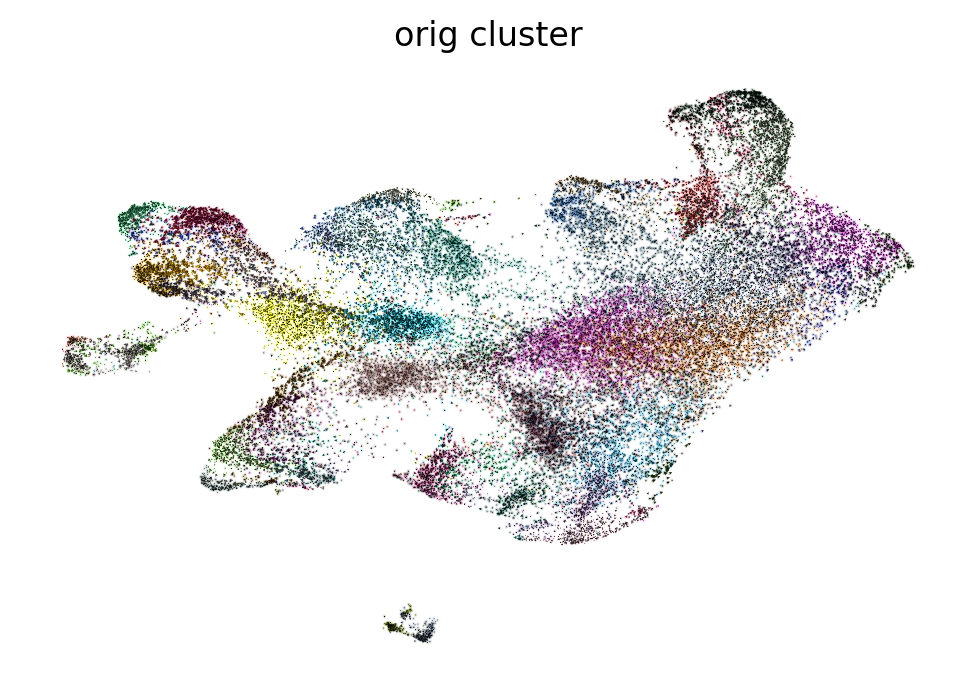

In [23]:
scv.pl.velocity_embedding(adata, basis="umap", color = "orig_cluster")


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

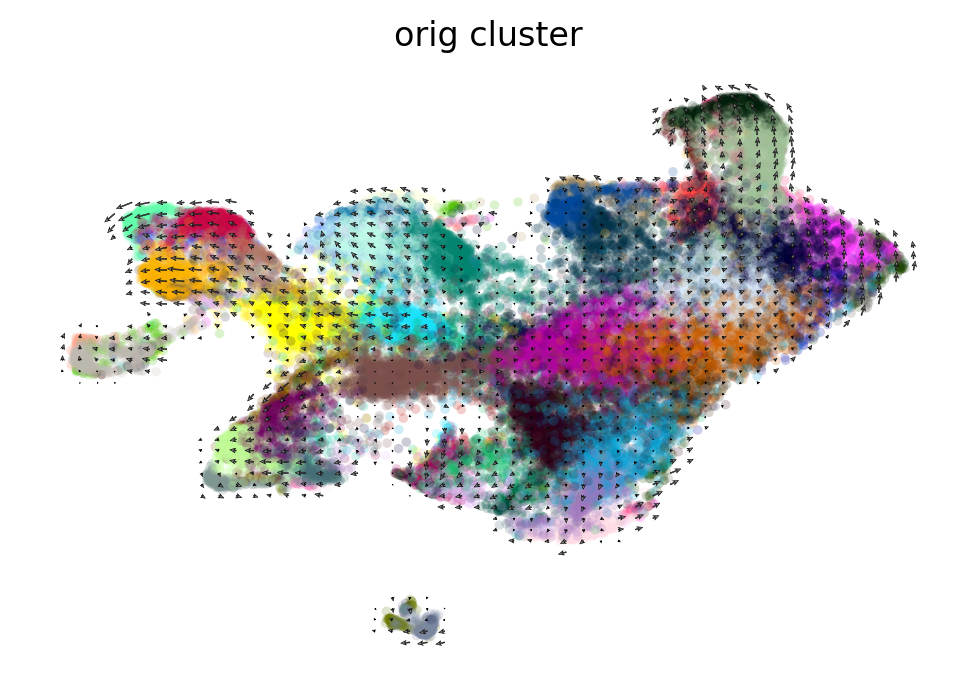

In [25]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color = "orig_cluster")

/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

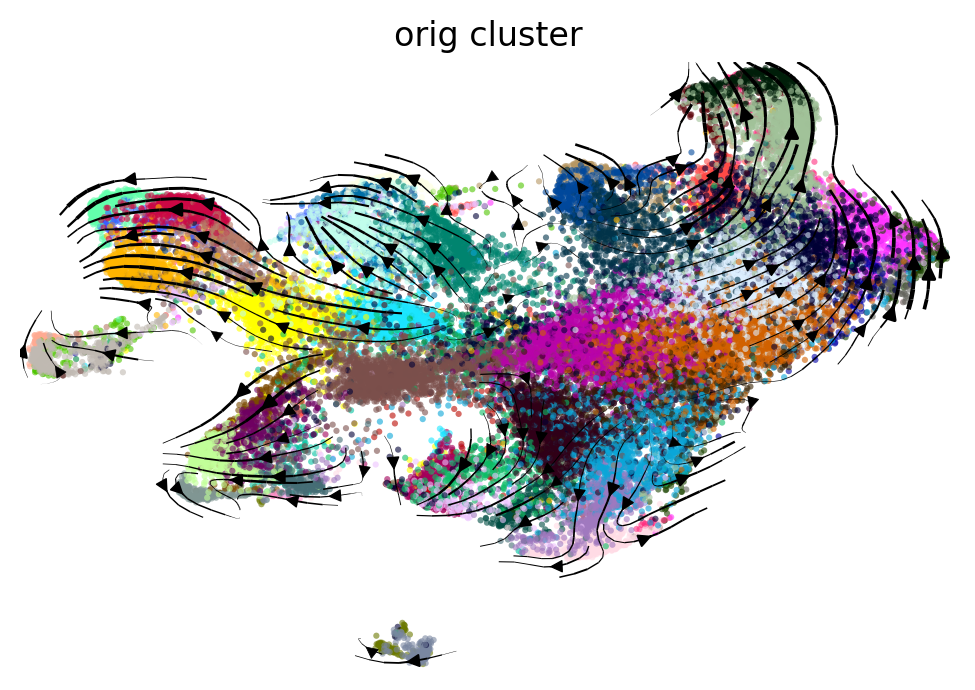

In [27]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color = "orig_cluster",
    legend_loc="none",
    size=20,
    alpha=0.6)

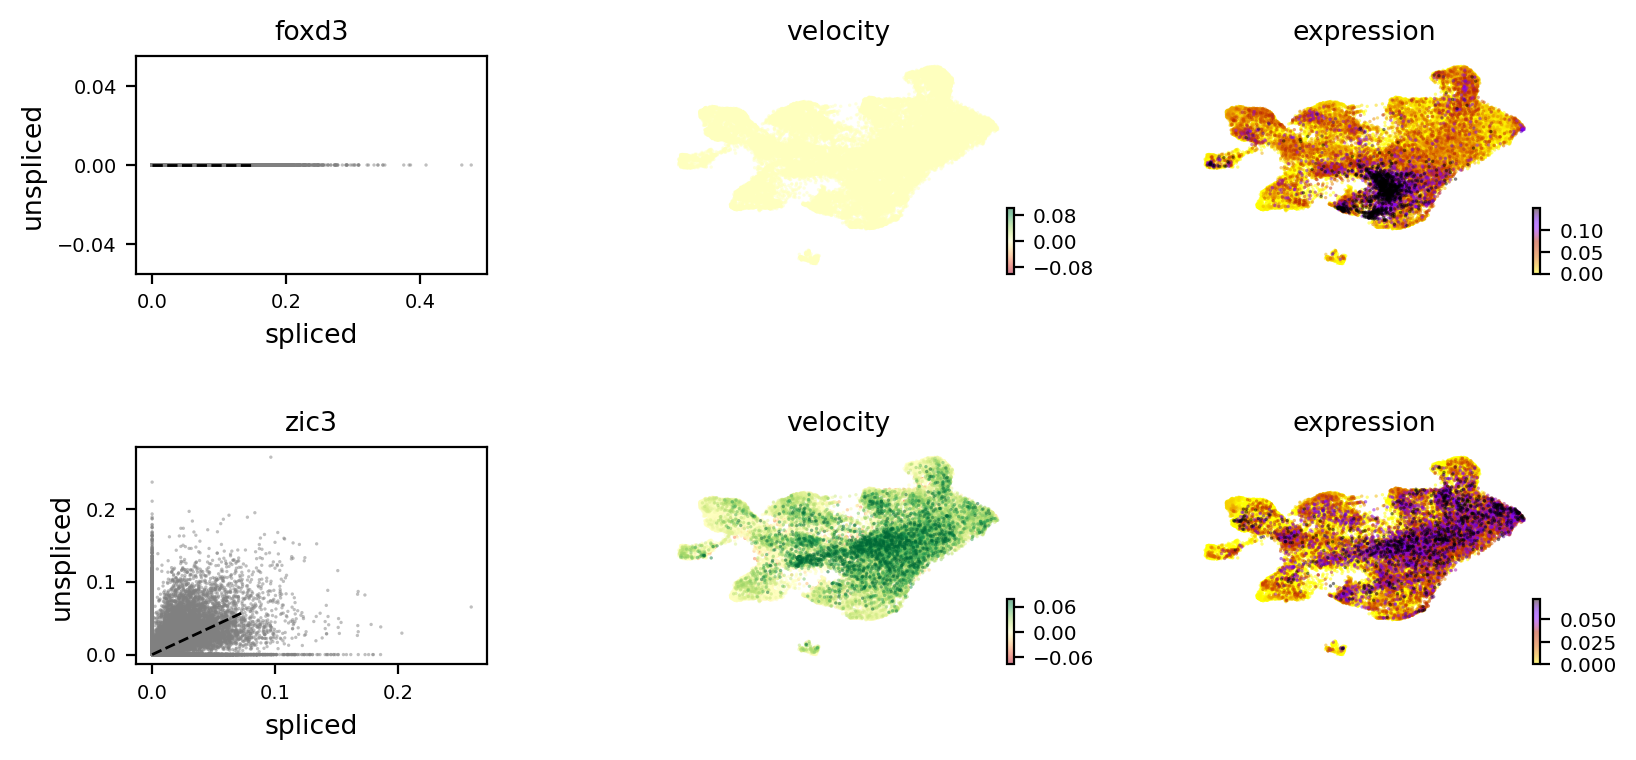

In [28]:
scv.pl.velocity(adata, ['foxd3', 'zic3'])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

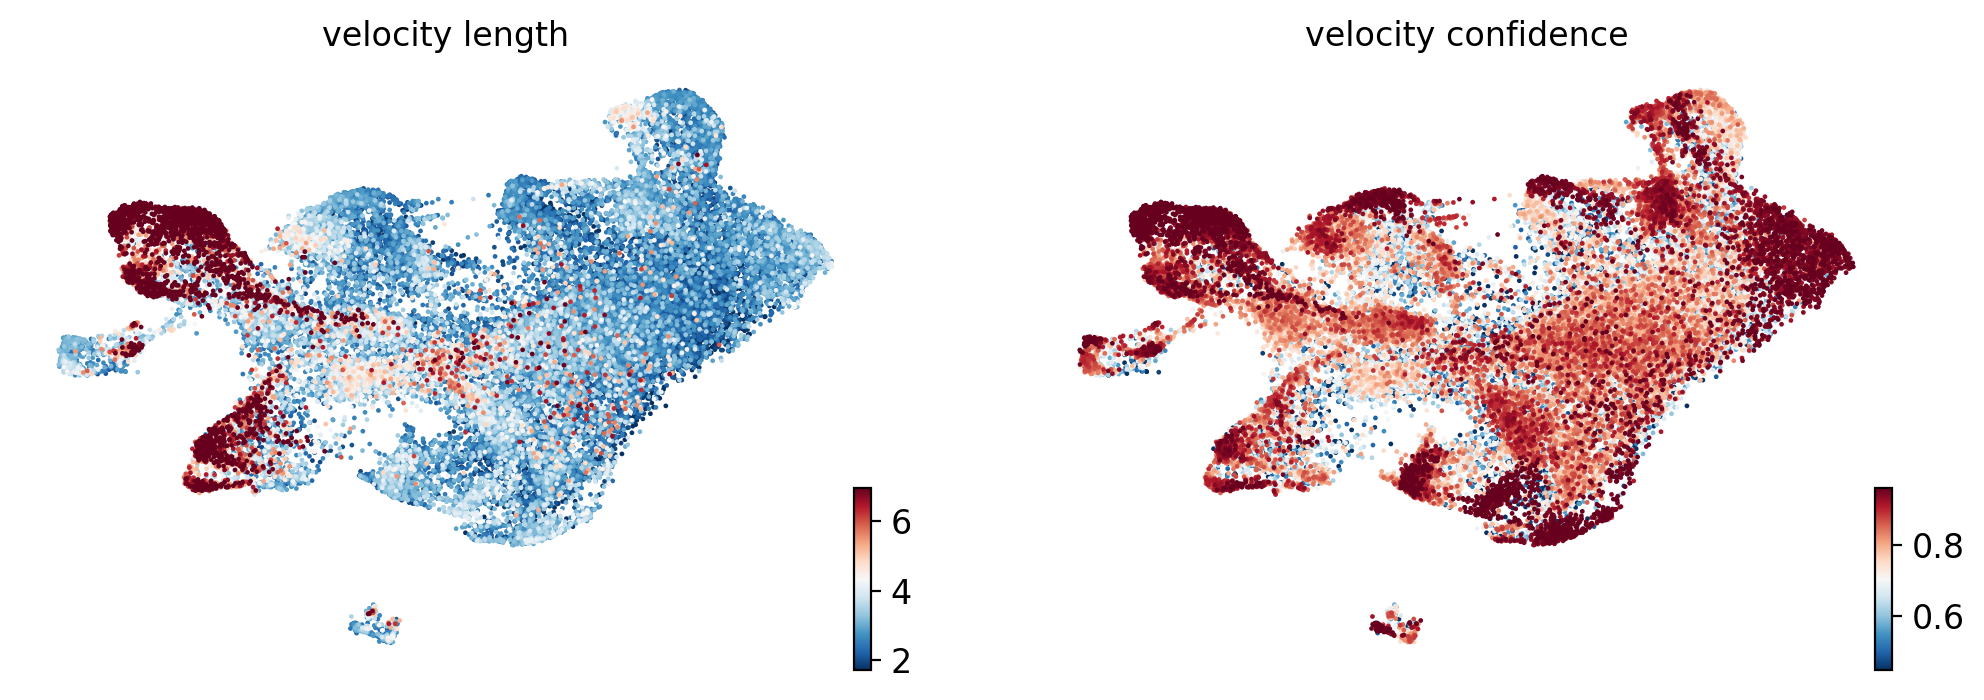

In [29]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c = keys, perc = [5,95])

computing terminal states
    identified 6 regions of root cells and 4 regions of end points .
    finished (0:00:07) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

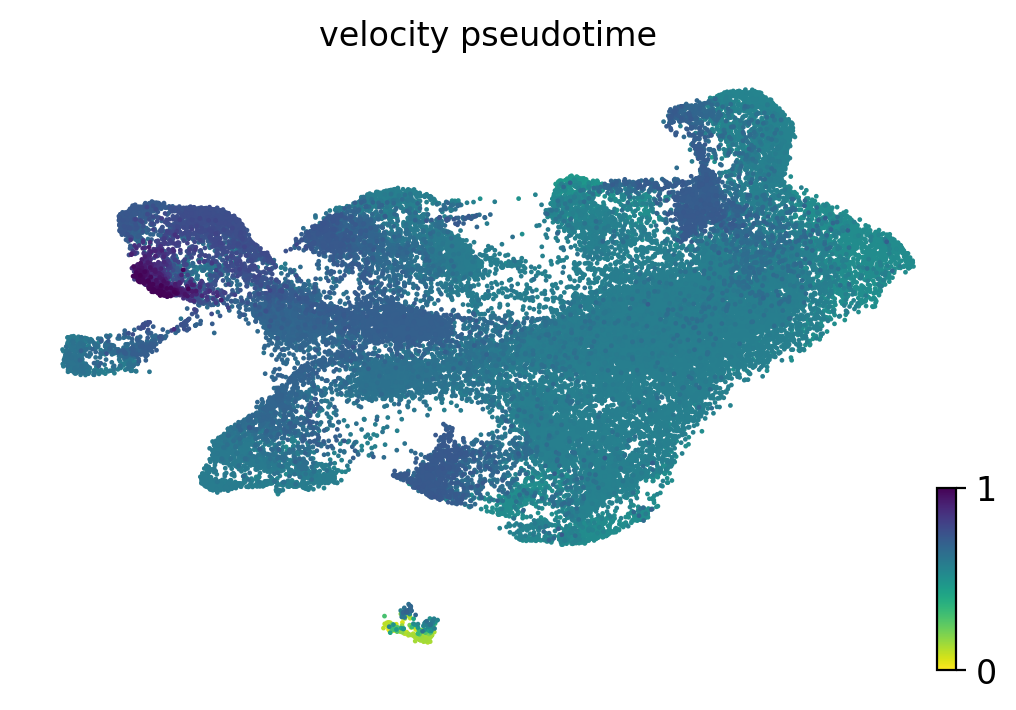

In [30]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color = 'velocity_pseudotime')

In [34]:
scv.settings.verbosity = 2


In [35]:
adata.n_obs, adata.n_vars


(36507, 22829)

In [36]:
type(adata.X)
type(adata.layers["spliced"])
type(adata.layers["unspliced"])


scipy.sparse._csr.csr_matrix

In [38]:
scv.tl.recover_dynamics(
    adata,
    n_top_genes=2000,
    n_jobs=-1,
    show_progress_bar=False
)

scv.tl.velocity(adata, mode = 'dynamical')


recovering dynamics (using 8/8 cores)
    finished (1:39:44)
computing velocities
    finished (0:39:06)
computing velocity graph (using 1/8 cores)


OSError: [Errno 12] Cannot allocate memory

computing velocity embedding
    finished (0:00:18)


/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_cellrank/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/neha/miniconda3/envs/scvelo_

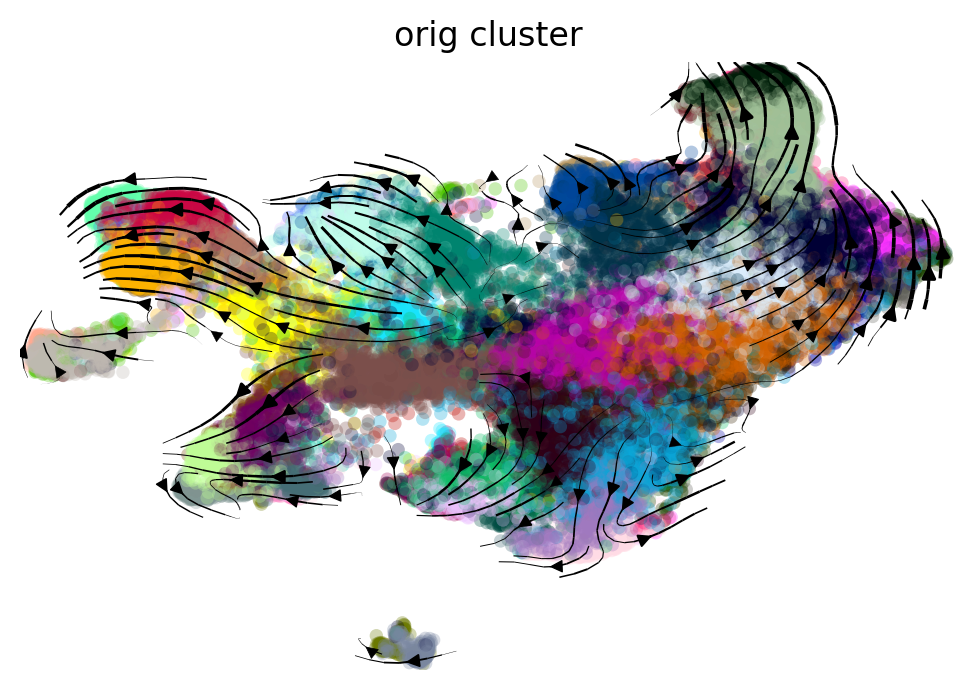

In [40]:

scv.pl.velocity_embedding_stream(adata, basis = 'umap', color = "orig_cluster",
    legend_loc="none")

In [1]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

NameError: name 'scv' is not defined

saving figure to file /home/neha/dorsalmigration/velocity/velocity/results/sam/s17dm_dynamic.png


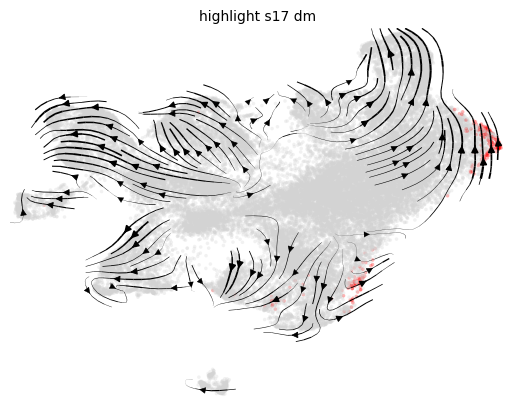

In [7]:
#color s17_18
adata.obs["highlight_s17_dm"] = np.where(
    adata.obs["orig_cluster"] == "s17_18",
    "s17_18",
    "other"
)

scv.pl.velocity_embedding_stream(
    adata,
    basis="umap",
    color="highlight_s17_dm",
    palette={"s17_18": "red", "other": "lightgrey"},
    legend_loc="none",
    save = '/home/neha/dorsalmigration/velocity/velocity/results/sam/s17dm_dynamic.png'
)

saving figure to file /home/neha/dorsalmigration/velocity/velocity/results/sam/grid_dynamic.png


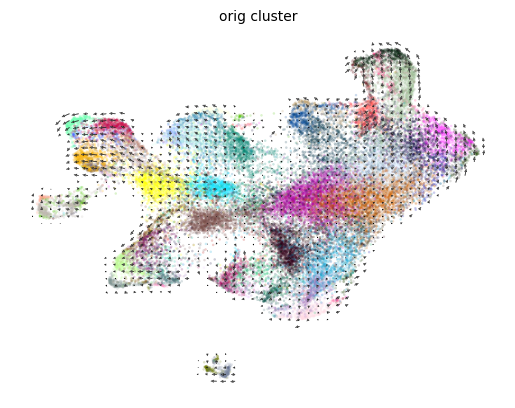

In [9]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color = "orig_cluster",
                               save = '/home/neha/dorsalmigration/velocity/velocity/results/sam/grid_dynamic.png')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
saving figure to file /home/neha/dorsalmigration/velocity/velocity/results/sam/velocity_confidence_dynamic.png


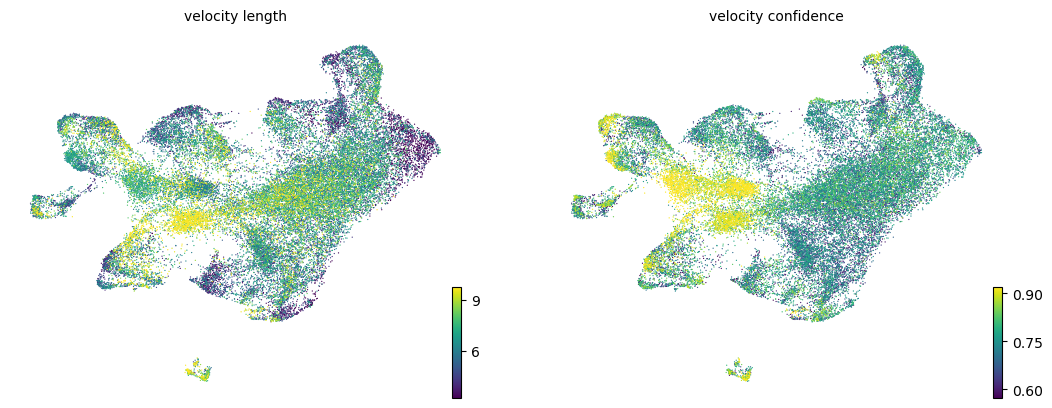

In [11]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c = keys, perc = [5,95],
              save = '/home/neha/dorsalmigration/velocity/velocity/results/sam/velocity_confidence_dynamic.png')

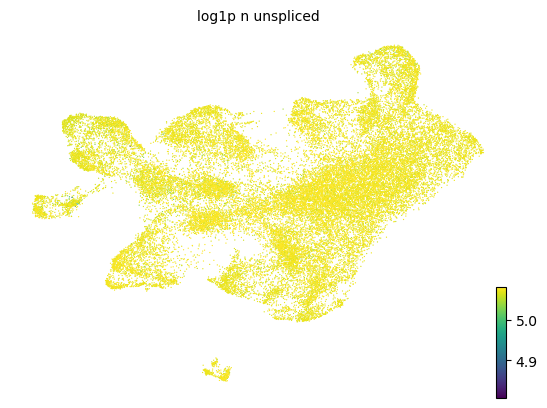

In [13]:
#middle region without velocity lines: are unsoliced counts too low?
adata.obs["n_spliced"]   = np.ravel(adata.layers["spliced"].sum(axis=1))
adata.obs["n_unspliced"] = np.ravel(adata.layers["unspliced"].sum(axis=1))

# log-scale is easier to see
adata.obs["log1p_n_unspliced"] = np.log1p(adata.obs["n_unspliced"])
adata.obs["unspliced_frac"] = adata.obs["n_unspliced"] / (
    adata.obs["n_spliced"] + adata.obs["n_unspliced"] + 1e-8
)

scv.pl.scatter(adata, basis="umap", color="log1p_n_unspliced")

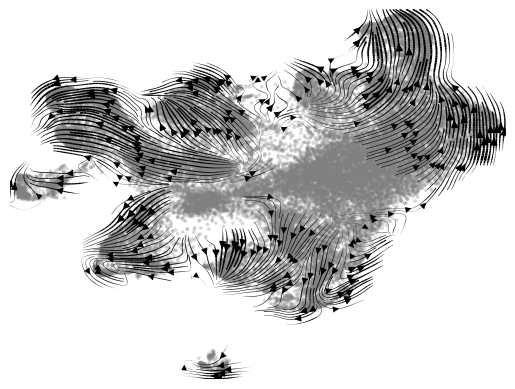

In [22]:
scv.pl.velocity_embedding_stream(
    adata,
    basis="umap",
    min_mass=0.1,
    density=1
)